# Python的可视化包——Matplotlib

Matplotlib是Python中最常用的可视化工具之一，可以非常方便的创建各种图表。

官网：[http://matplotlib.org](http://matplotlib.org)

----

## 1. Matplotlib的加载

如果要在jupyter notebook中交互式的使用matplotlib的绘图，需要加上以下命令：
```
%matplotlib inline
```
按照惯例：matplotlib的别名为mpl，matplotlib.pyplot的别名为plt。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 可以使用rcParams来设置一些全局参数
# 例如，下面的设置用来把坐标轴的字体设置为18pt
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# 2. Matplotlib的2D绘图


## 2.1 绘制点、线图
例如绘制下面的函数：
$$2*sin(x)+0.3x^2$$
1. 绘制标准的函数；
2. 进行随机采样，采样的时候遵从高斯分布
$$ \sim {\rm N}\left( {\mu ,{\sigma ^2}} \right)$$

In [3]:
np.random.seed(42)

# x轴的采样点设置为0到5之间的100个点
x = np.linspace(0, 5, 100)

# 计算两个数据列，y用来存储无噪声的结果，y_sample用来存储带有噪声的采样结果
y = 2 * np.sin(x) + 0.3 * x ** 2
y_sample = y + np.random.normal(scale=0.3, size=100)

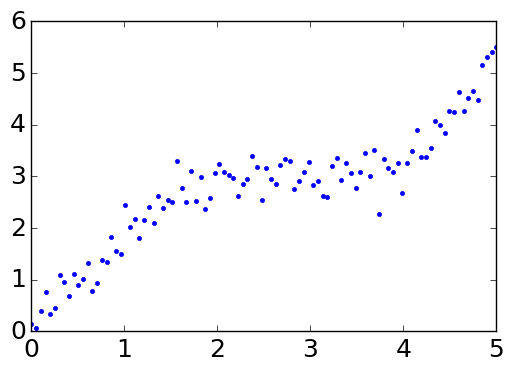

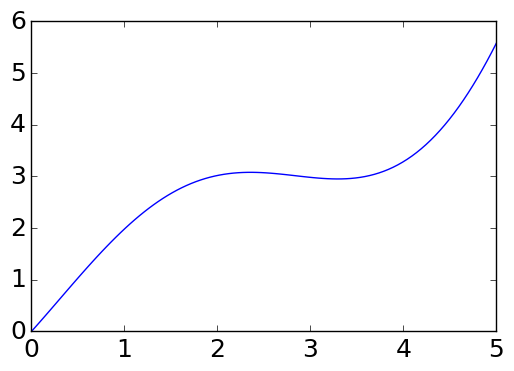

In [4]:
# 绘制采样数据的散点图
plt.figure('data')

# 输出采样数据
plt.plot(x, y_sample, '.')

# 绘制模型数据的曲线图
plt.figure('model')

# 绘制曲线
plt.plot(x,y)

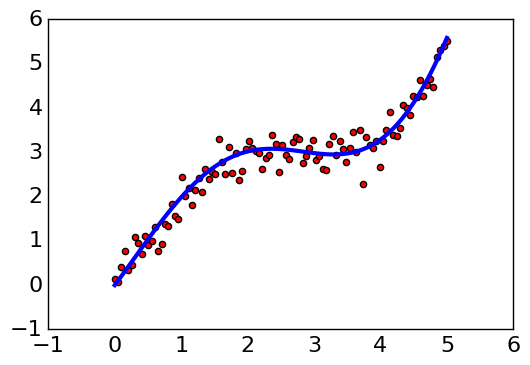

In [11]:
# 同时显示两个数据系列到同一个图表中

plt.figure('data & model')

# 用'b'设置线的颜色，lw=3
# 'b'也可以改为'r--'，表示红色的虚线
plt.plot(x, y, 'b', lw=3)

# scatter用来绘制散点图
plt.scatter(x, y_sample, c='r', edgecolor='k')

# 将当前figure的图保存到文件
plt.savefig('result.png')

## 2.2 绘制饼图、柱状图与子图

In [39]:
# 对图表的全局配置进行修改
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

In [40]:
# 狗、猫和猎豹的最高奔跑速度
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

([<matplotlib.patches.Wedge at 0x10fb71940>,
  <matplotlib.text.Text at 0x10f6959b0>])

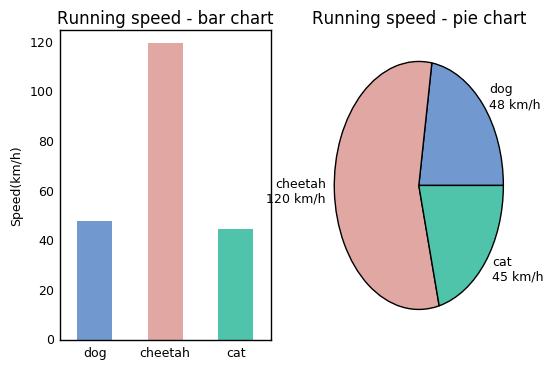

In [41]:
fig = plt.figure('Bar chart & Pie Chart')

# 添加一个子图，一行两列的子图的第一个
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Running speed - bar chart')

# 生成x轴的每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应的颜色
colors = [x[1] for x in speed_map.values()]

# 绘制柱状图
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none', color=colors)

# 设置图表的属性
ax.set_ylabel('Speed(km/h)')
ax.set_xticks(xticks+bar_width/2)
ax.set_xticklabels(animals)
ax.set_xlim(bar_width/2 - 0.5, 3 - bar_width/2)
ax.set_ylim([0, 125])


# 添加一个新的子图
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Running speed - pie chart')


labels = ['{0}\n{1} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

([<matplotlib.patches.Wedge at 0x10fa62a90>,
  <matplotlib.text.Text at 0x10fa72b70>])